# 보스턴 데이터
## 13개 특성 : 12개 => 독립변수, 1개 => 종속변수
## 스케일 통일 필요
## 회귀 / 단위일정하게 조정필요=> 전처리에서 조정
## 참고자료: https://www.youtube.com/watch?v=utP3gh9DZI8&t=1433s

## 라이브러리 불러오기

In [ ]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-5-b314297a51da>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


## 데이터 불러오기

In [ ]:
#  train:test = 8:2
tf.random.set_seed(111)
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='./boston(506_14).csv', test_split=0.2, seed=111)

In [ ]:
# 데이터 확인
print(x_train_full.shape, y_train_full.shape)
print("테스트 데이터: {}\t 레이블: {}".format (x_test.shape, y_test.shape))

(404, 13) (404,)
테스트 데이터: (102, 13)	 레이블: (102,)


In [ ]:
print(x_train_full[0])    # [0]번째  13개 독립변수, feature, attribute

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [ ]:
print(y_train_full[0])     # [0]번째 1개 종속변수의 실제값 $25,000 집값

25.0


## 데이터 전처리

In [ ]:
# 데이터 전처리 (scale 바꾸기, val=0.3)
mean = np.mean(x_train_full, axis=0)
std  = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full, test_size = 0.3, random_state=111)

print(x_train_full.shape, y_train_full.shape)  # 학습 데이터
print(x_train.shape,      y_train.shape)       # 학습 데이터
print(x_val.shape,        y_val.shape)         # 검증 데이터
print("테스트 데이터: {}\t 레이블: {}".format(x_test.shape,      y_test.shape))         # 테스트 데이터

(404, 13) (404,)
(282, 13) (282,)
(122, 13) (122,)
테스트 데이터: (102, 13)	 레이블: (102,)


## 모델 구현

In [ ]:
# 모델 구성 (학습데이터가 작고 모델이 깊으면 => 과적합(Overfitting) 날 가능성 높음.)
model =  Sequential([Dense(128, activation='relu', input_shape=(13, ), name='dense1'),
                    Dense( 64, activation='relu', name='dense2'),
                    Dense( 32, activation='relu', name='dense3'),
                    Dense(1, name='output')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 128)               1792      
                                                                 
 dense2 (Dense)              (None, 64)                8256      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


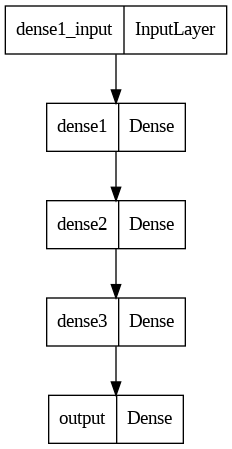

In [ ]:
plot_model(model)

In [ ]:
# 모델 컴파일
# 회귀 에서는 평균제곱오차 MSE=mean squared error를 손실함수
# 평균절대오차 MAE = mean absolute error 를 평가지표로 많이 사용함
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.02),
              metrics =['mae'] )

In [ ]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=300,
                    validation_data=(x_val, y_val))

Epoch 1/300
9/9 [==============================] - 1s 30ms/step - loss: 216.4883 - mae: 10.7879 - val_loss: 29.0851 - val_mae: 3.9612
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 34.0118 - mae: 4.4193 - val_loss: 18.6950 - val_mae: 3.3877
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 20.8801 - mae: 3.4198 - val_loss: 21.8955 - val_mae: 3.6060
Epoch 4/300
9/9 [==============================] - 0s 8ms/step - loss: 19.1349 - mae: 3.1185 - val_loss: 13.3992 - val_mae: 2.8894
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 14.2162 - mae: 2.7390 - val_loss: 10.2097 - val_mae: 2.5268
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 11.6415 - mae: 2.3676 - val_loss: 9.2307 - val_mae: 2.3346
Epoch 7/300
9/9 [==============================] - 0s 8ms/step - loss: 12.6520 - mae: 2.5406 - val_loss: 10.1912 - val_mae: 2.4508
Epoch 8/300
9/9 [==============================] - 0s 9ms/step - loss: 14.3729 - 

In [ ]:
# 모델 평가
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 19.8840 - mae: 2.7512


[19.88401985168457, 2.751166820526123]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


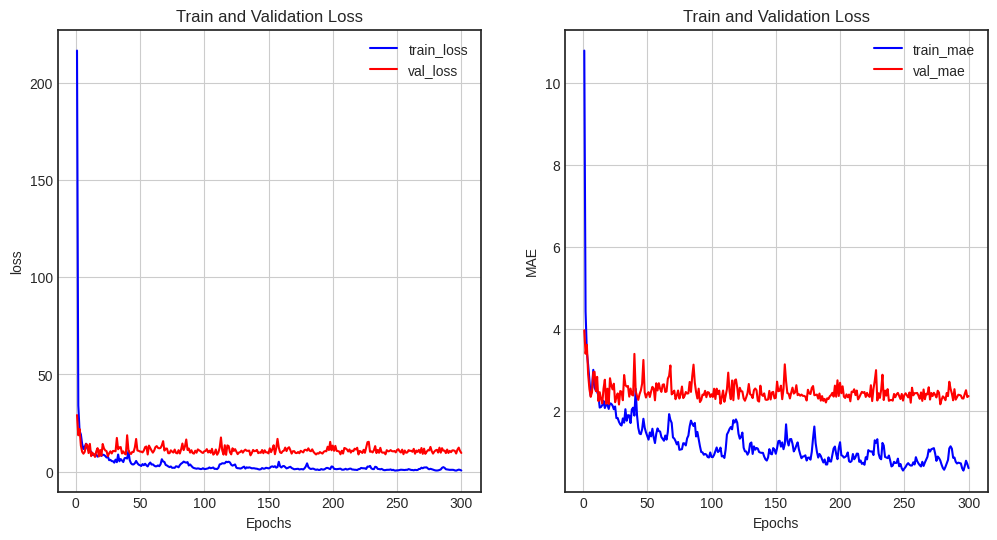

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs=range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 6))

ax1 =fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 =fig.add_subplot(1,2,2)
ax2.plot(epochs, mae, color='blue', label='train_mae')
ax2.plot(epochs, val_mae, color='red', label='val_mae')
ax2.set_title('Train and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

# k-fold (시험문제 안 나옴)

In [ ]:
#
tf.random.set_seed(111)
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=111)

# 데이터 전처리 (scale 바꾸기)
mean = np.mean(x_train_full, axis=0)
std  = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

57026/57026 [==============================] - 0s 0us/step


In [ ]:
#
k=3

kfold = KFold(n_splits=k, random_state=111, shuffle=True)

In [ ]:
def build_model():
  input   = Input(shape=(13, ), name='input')
  hidden1 = Dense(128, activation='relu', name='dense1')(input)
  hidden2 = Dense( 64, activation='relu', name='dense2')(hidden1)
  hidden3 = Dense( 32, activation='relu', name='dense3')(hidden2)
  output =  Dense(1, name='output')(hidden3)

  model=Model(inputs=[input], outputs=output)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])

  return model

In [ ]:
mae_list=[]

In [ ]:
for train_idx, val_idx in kfold.split(x_train):
  x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
  y_train_fold, y_val_fold = y_train_full[train_idx], y_train_full[val_idx]

  model=build_model()

  model.fit(x_train_fold, y_train_fold, epochs=300, validation_data=(x_val_fold, y_val_fold))

  _, test_mae = model.evaluate(x_test, y_test)
  mae_list.append(test_mae)


Epoch 1/300
6/6 [==============================] - 2s 76ms/step - loss: 634.3751 - mae: 23.2861 - val_loss: 596.7972 - val_mae: 22.5975
Epoch 2/300
6/6 [==============================] - 0s 34ms/step - loss: 614.4052 - mae: 22.8483 - val_loss: 578.8747 - val_mae: 22.1871
Epoch 3/300
6/6 [==============================] - 0s 23ms/step - loss: 593.9559 - mae: 22.3954 - val_loss: 556.9747 - val_mae: 21.6698
Epoch 4/300
6/6 [==============================] - 0s 32ms/step - loss: 566.1964 - mae: 21.7601 - val_loss: 527.0695 - val_mae: 20.9376
Epoch 5/300
6/6 [==============================] - 0s 12ms/step - loss: 528.4114 - mae: 20.8699 - val_loss: 486.5006 - val_mae: 19.9223
Epoch 6/300
6/6 [==============================] - 0s 11ms/step - loss: 477.1833 - mae: 19.5338 - val_loss: 433.2946 - val_mae: 18.5152
Epoch 7/300
6/6 [==============================] - 0s 11ms/step - loss: 414.1241 - mae: 17.7105 - val_loss: 366.8683 - val_mae: 16.7390
Epoch 8/300
6/6 [==============================]

In [ ]:
print(mae_list)

[9.492242813110352, 7.815500736236572, 8.582124710083008]


In [ ]:
print(np.mean(mae_list))

8.629956086476644
